## Chapter 09. 상품 리뷰 분석 (NLP)

### 01. 분석의 목적
- Word Cloud를 통해 중요 단어 확인
- Naive Bayes 모델을 통해 리뷰의 별점 예측
- Data: Yelp Review

### 02. 모듈 & 데이터 로딩 : 평점과 리뷰 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./data/yelp.csv", index_col=0)

data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


In [3]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [4]:
data.drop(['review_id', 'user_id', 'business_id', 'date'], axis=1, inplace=True)

data.head()

,stars,text,useful,funny,cool
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,5,This has become our go-to sushi place. The sus...,0,0,0
1139855,1,I was very disappointed with the hotel. The re...,2,1,1
3997153,5,Love this place - super amazing - staff here i...,0,0,0
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [5]:
data.iloc[0]['text']

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [6]:
len(data.iloc[0]['text'])

347

In [7]:
data['text'].apply(len)

2967245     347
4773684     377
1139855     663
3997153     141
4262000     455
           ... 
1567641     779
4910763     268
1036315    1288
555962     1160
838267      137
Name: text, Length: 10000, dtype: int64

In [8]:
data['text_length'] = data['text'].apply(len)

data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,5,This has become our go-to sushi place. The sus...,0,0,0,377
1139855,1,I was very disappointed with the hotel. The re...,2,1,1,663
3997153,5,Love this place - super amazing - staff here i...,0,0,0,141
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0,455


In [9]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

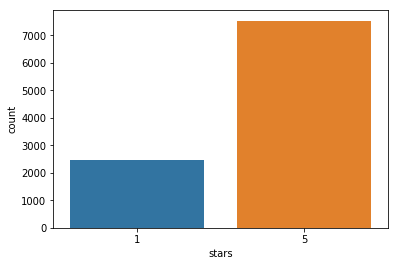

In [10]:
sns.countplot(data['stars'])

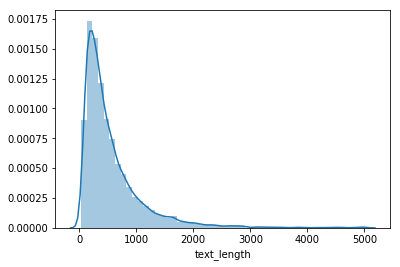

In [11]:
sns.distplot(data['text_length'])

In [12]:
data.corr()

,stars,useful,funny,cool,text_length
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_length,-0.221752,0.161592,0.215003,0.193500,1.000000


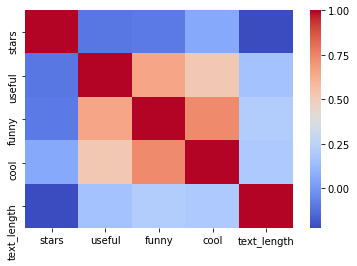

In [13]:
sns.heatmap(data.corr(), cmap='coolwarm')

### 03. 텍스트에서 기호 제거하기

In [14]:
data['text']

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
                                 ...                        
1567641    I'm a sucker for places like this. Get me in f...
4910763    Extremely rude staff!  Was told 4 min on a lar...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer, then look no...
838267     Awesome food. Awesome beer. Awesome service. N...
Name: text, Length: 10000, dtype: object

In [15]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
s = data.iloc[0]['text']

s

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

- 방법 1

In [17]:
def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = "".join(new_s)
    return new_s

In [18]:
data['text'].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

- 방법 2

In [19]:
"".join([i for i in s if i not in string.punctuation])

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

In [20]:
data['text'].apply(lambda x: "".join([i for i in x if i not in string.punctuation]))

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [21]:
data['text'] = data['text'].apply(lambda x: "".join([i for i in x if i not in string.punctuation]))

### 04. 상투적인 단어 제거하기

In [ ]:
import nltk
nltk.download('stopwords')

In [23]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
data['text']

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

- 방법 1

In [25]:
def stop_w(x):
    new_s = []
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_s.append(i.lower())
    return new_s

In [26]:
data['text'].apply(stop_w)

2967245    [love, cheeses, worth, price, great, finding, ...
4773684    [become, goto, sushi, place, sushi, always, fr...
1139855    [disappointed, hotel, restaurants, good, booke...
3997153    [love, place, super, amazing, staff, always, f...
4262000    [thank, dana, dyed, hair, black, previously, k...
                                 ...                        
1567641    [im, sucker, places, like, get, front, meat, c...
4910763    [extremely, rude, staff, told, 4, min, large, ...
1036315    [live, nyc, went, rtr, flatiron, didnt, select...
555962     [looking, trainer, look, moment, humberto, met...
838267     [awesome, food, awesome, beer, awesome, servic...
Name: text, Length: 10000, dtype: object

- 방법 2

In [27]:
data['text'].apply(lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('english')])

2967245    [love, cheeses, worth, price, great, finding, ...
4773684    [become, goto, sushi, place, sushi, always, fr...
1139855    [disappointed, hotel, restaurants, good, booke...
3997153    [love, place, super, amazing, staff, always, f...
4262000    [thank, dana, dyed, hair, black, previously, k...
                                 ...                        
1567641    [im, sucker, places, like, get, front, meat, c...
4910763    [extremely, rude, staff, told, 4, min, large, ...
1036315    [live, nyc, went, rtr, flatiron, didnt, select...
555962     [looking, trainer, look, moment, humberto, met...
838267     [awesome, food, awesome, beer, awesome, servic...
Name: text, Length: 10000, dtype: object

In [28]:
data['text'] = data['text'].apply(lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('english')])

### 05. 단어 빈도 그래프 및 Word Cloud 만들기

In [29]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,"[love, cheeses, worth, price, great, finding, ...",0,0,1,347
4773684,5,"[become, goto, sushi, place, sushi, always, fr...",0,0,0,377
1139855,1,"[disappointed, hotel, restaurants, good, booke...",2,1,1,663
3997153,5,"[love, place, super, amazing, staff, always, f...",0,0,0,141
4262000,5,"[thank, dana, dyed, hair, black, previously, k...",0,0,0,455


In [30]:
word_split = []
for i in range(len(data)):
    for j in data.iloc[i]['text']:
        word_split.append(j)

len(word_split)

542773

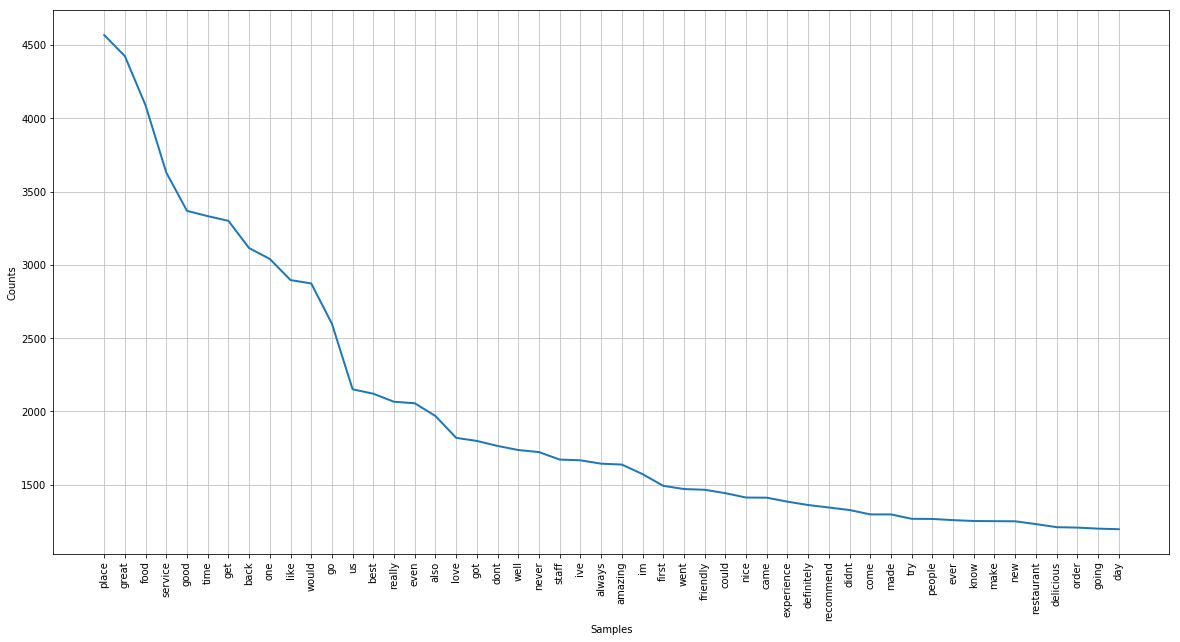

In [31]:
from nltk.probability import FreqDist

plt.figure(figsize=(20, 10))
FreqDist(word_split).plot(50)

(-0.5, 399.5, 199.5, -0.5)

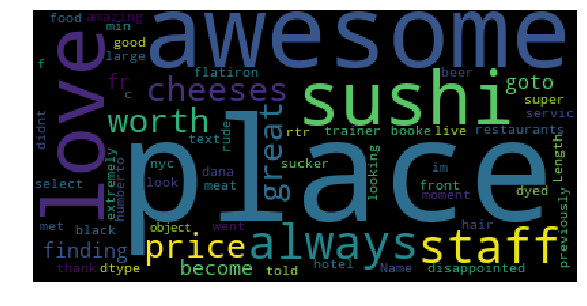

In [32]:
from wordcloud import WordCloud

wc = WordCloud().generate(str(data['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

- WordCloud 자체적으로 stopwords를 한 번 더 필터링해주기 때문에, 빈도 그래프와 완벽히 일치하지는 않음

In [33]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

In [34]:
good = data[data['stars'] == 5]['text']
bad = data[data['stars'] == 1]['text']

(-0.5, 399.5, 199.5, -0.5)

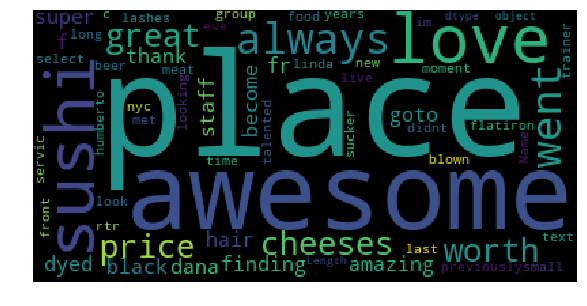

In [35]:
wc = WordCloud().generate(str(good))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

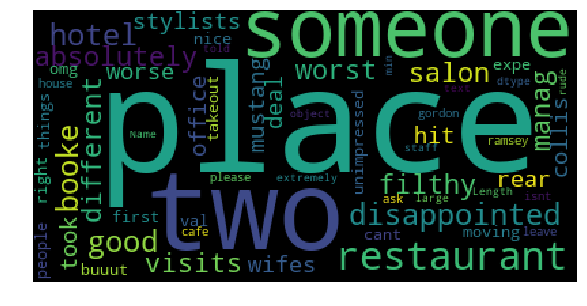

In [36]:
wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

### 06. 나이브 베이즈 모델을 통한 예측 모델 구축

In [37]:
data = pd.read_csv('./data/yelp.csv', index_col=0)

data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [38]:
X = data['text']
y = data['stars']

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [40]:
X = cv.transform(X)

In [41]:
print(X)

  (0, 1423)	1
  (0, 1453)	1
  (0, 1580)	1
  (0, 1905)	2
  (0, 2027)	2
  (0, 3066)	1
  (0, 3694)	1
  (0, 4157)	1
  (0, 4938)	1
  (0, 4975)	1
  (0, 5112)	1
  (0, 6921)	1
  (0, 7535)	1
  (0, 9746)	2
  (0, 10103)	2
  (0, 10370)	1
  (0, 10440)	1
  (0, 11315)	1
  (0, 12016)	1
  (0, 12805)	1
  (0, 13373)	1
  (0, 15023)	1
  (0, 15210)	1
  (0, 15742)	1
  (0, 15791)	1
  :	:
  (9998, 27679)	3
  (9998, 27786)	1
  (9998, 27818)	1
  (9998, 27974)	2
  (9998, 28038)	3
  (9999, 1580)	1
  (9999, 2380)	3
  (9999, 2611)	1
  (9999, 2857)	1
  (9999, 8012)	1
  (9999, 9067)	1
  (9999, 10081)	1
  (9999, 10103)	1
  (9999, 10417)	1
  (9999, 11067)	1
  (9999, 14879)	1
  (9999, 16451)	1
  (9999, 16901)	1
  (9999, 21795)	1
  (9999, 22108)	1
  (9999, 22260)	1
  (9999, 25145)	1
  (9999, 26879)	1
  (9999, 27679)	1
  (9999, 28048)	1


In [42]:
cv.get_feature_names()[1423]

'also'

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [44]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
pred = model.predict(X_test)

pred

array([5, 5, 5, ..., 1, 5, 1])

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, pred)

0.9265

In [47]:
confusion_matrix(y_test, pred)

array([[ 421,   65],
       [  82, 1432]])

In [48]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.84      0.87      0.85       486
          5       0.96      0.95      0.95      1514

avg / total       0.93      0.93      0.93      2000



- RandomForest와 비교해보기

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=1000)
rf.fit(X_train, y_train)

/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `boo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
pred2 = rf.predict(X_test)

/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [51]:
accuracy_score(y_test, pred2)

0.787

In [52]:
confusion_matrix(y_test, pred2)

array([[  63,  423],
       [   3, 1511]])

In [53]:
print(classification_report(y_test, pred2))

             precision    recall  f1-score   support

          1       0.95      0.13      0.23       486
          5       0.78      1.00      0.88      1514

avg / total       0.82      0.79      0.72      2000



- 보통 복잡한 모델이 성능이 더 좋기 마련인데, 텍스트의 경우 나이브 베이즈가 더 간단하면서도 성능이 나은 모습을 볼 수 있음

### 07. Word Cloud 소개
- 단어의 빈도수에 따라, 더 자주 등장하는 단어를 더 크고 굵게 보여주는 Visualization 기법
- 활용 사례
    - Finding Pain Points: 불만사항이 적힌 텍스트들에서 주로 어떤 사항이 불만요소로 나오는지 확인
    - SEO(Search Engine Optimization): 관련된 주요 키워드를 확인하여, 사이트를 검색 결과에 더욱 잘 노출시키도록 개선

### 08. Counter Vectorizer란?
- 단어별 빈도를 계산하여 데이터 프레임으로 정리
- 모든 rows의 단어들을 체크하여 유무 및 빈도 등을 확인

### 09. Nave Bayes Classifier 원리와 장단점
- 각 변수가 독립적이라는 가정 -> 속도가 빠름
- n(관측치의 개수) < p(column의 개수) 일 때, 유용하게 쓰임 -> 과적합 가능성 낮음
- 딥러닝을 제외하면, 텍스트 데이터에 가장 적합 (스팸 메일 필터링, 감정 분석)
- P(A|B) = P(B|A)P(A) / P(B) (P(B|A): 사후 확률, P(A): 사전 확률, P(B): 전체 확률)